In [1]:
import MySQLdb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
myvars = {}
with open("ajakpa-mysql-password-project") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()

myvars.keys()

# print("#",myvars['DB username'],"#", "#",myvars['DB password'],"#", "#",myvars['DB databasename'],"#")

conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db=myvars['DB databasename'])
# cursor = conn.cursor()
# cursor.execute('select * from `characteristics_combined_data`')
# accident_circumstance = cursor.fetchall()

accident_circumstance = pd.read_sql('select * from `characteristics_combined_data1`',conn)
accident_location = pd.read_sql('SELECT * FROM `places_combined_data1`',conn)
people_accident = pd.read_sql('SELECT * FROM `users_combined_data1`',conn)
accident_vehicle = pd.read_sql('SELECT * FROM `vechicles_combined_data1`',conn)
# accident_circumstance.axes
# accident_circumstance.mode()



In [3]:
# saved file in csv
accident_circumstance.to_csv('accident_circumstance.csv', encoding='utf-8')
accident_location.to_csv('accident_location.csv', encoding='utf-8')
people_accident.to_csv('people_accident.csv', encoding='utf-8')
accident_vehicle.to_csv('accident_vehicle.csv', encoding='utf-8')

In [4]:
accident_circumstance1 = accident_circumstance.copy()
accident_circumstance1.to_csv('accident_circumstance1.csv', encoding='utf-8')

In [5]:
accident_circumstance1.tail()

,Num_Acc,accident_year,accident_month,accident_day,hrmn,light_conditions,location,intersection:,atmospheric_condition,collision_type,municipality,postal_address,gps,latitude,longitude,dept
1015944,201900058836,2019,11,30,09:00,1,1,1,5,2,69288,A43 13.029 A 15.971,None,"45,6666600","5,0561200",69
1015945,201900058837,2019,11,27,07:50,1,1,1,8,4,67482,Autoroute A.35,None,"48,5769000","7,7269000",67
1015946,201900058838,2019,11,30,02:41,4,1,1,1,6,94021,AUTOROUTE A6A,None,"48,7717000","2,3457600",94
1015947,201900058839,2019,11,30,15:20,1,1,1,1,7,78640,A86 EXT,None,"48,7772890","2,2237590",78
1015948,201900058840,2019,11,29,20:50,3,1,1,1,2,92047,A13,None,"48,8351236","2,1751101",92


In [6]:
# Merging 4 tables into 1
accident_circumstance1 = accident_circumstance1.merge(accident_location, on=['Num_Acc'], how= 'inner')
accident_circumstance1 = accident_circumstance1.merge(people_accident, on=['Num_Acc'], how= 'inner')
accident_circumstance1 = accident_circumstance1.merge(accident_vehicle, on=['Num_Acc'], how= 'inner')
accident_circumstance1.to_csv('accident_circumstance1.csv', encoding='utf-8')



In [7]:
accident_circumstance1

,Num_Acc,accident_year,accident_month,accident_day,hrmn,light_conditions,location,intersection:,atmospheric_condition,collision_type,...,pedestrian_action,injured_pedestrian_alone_or_not,flow_direction,vechicle_category,number_of_occupants_in_public_transport,fixed_obstacle_struck,movable_obstacle_struck,Initial_shock_point,manv_before_accident,num_veh_y
0,200500000001,5,1,12,1900,3,2,1,1,3,...,0,0,0,7,000,00,2,1,01,A01
1,200500000002,5,1,21,1600,1,2,1,1,1,...,0,0,0,7,000,00,2,7,16,A01
2,200500000003,5,1,21,1845,3,1,1,2,1,...,0,0,0,2,000,00,2,1,01,A01
3,200500000004,5,1,4,1615,1,1,1,1,5,...,0,0,0,7,000,00,2,1,13,A01
4,200500000005,5,1,10,1945,3,1,1,3,6,...,0,0,0,7,000,06,0,8,01,A01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338194,201900030058,2019,9,2,19:00,1,1,1,1,7,...,0,-1,2,33,,00,0,0,1,A01
1338195,201900030059,2019,9,4,16:35,1,2,4,1,4,...,0,-1,1,15,,00,2,2,12,A01
1338196,201900030060,2019,9,4,08:50,1,2,1,1,4,...,0,-1,2,7,,00,2,7,12,A01
1338197,201900030061,2019,9,3,06:25,2,2,4,1,2,...,0,-1,1,33,,00,2,1,2,A01


In [8]:
accident_circumstance1 = pd.read_csv('accident_circumstance1.csv') 

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (5,11,14,15,16,18,20,25,26,34,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
print('Row count     :',accident_circumstance1.shape[0])
print('Column count  :',accident_circumstance1.shape[1])
print('\nList of Features :\n     :',accident_circumstance1.columns.tolist())
print('\nMissing values    :',accident_circumstance1.isnull().sum())
print('\nActual values    :',accident_circumstance1.notnull().values.sum())
print('\nUnique values :  \n',accident_circumstance1.nunique())

Row count     : 1338199
Column count  : 57

List of Features :
     : ['Unnamed: 0', 'Num_Acc', 'accident_year', 'accident_month', 'accident_day', 'hrmn', 'light_conditions', 'location', 'intersection:', 'atmospheric_condition', 'collision_type', 'municipality', 'postal_address', 'gps', 'latitude', 'longitude', 'dept', 'road_category', 'route_number', 'numerical_index_of_the road', 'alphanumeric_road_index', 'traffic_regime', 'total_number_of_traffic_lanes', 'reserved_lane', 'road_gradient', 'upstream_terminal', 'dist_from_upstream_terminal', 'plan', 'width_of_central_reservation', 'road_width', 'surface_condition', 'infrastructure', 'accident_situation', 'env1', 'id_vehicule', 'num_veh_x', 'place', 'user_category', 'severity_of_user_injury', 'gender', 'driver_birthyr', 'reason_for_travel', 'secu', 'security_equipement_1', 'security_equipement_2', 'secu3', 'pedestrian_location', 'pedestrian_action', 'injured_pedestrian_alone_or_not', 'flow_direction', 'vechicle_category', 'number_of_oc

In [10]:
accident_circumstance1.isnull().sum()

Unnamed: 0                                       0
Num_Acc                                          0
accident_year                                    0
accident_month                                   0
accident_day                                     0
hrmn                                             0
light_conditions                                 0
location                                         0
intersection:                                    0
atmospheric_condition                          136
collision_type                                  42
municipality                                     2
postal_address                              185356
gps                                         622067
latitude                                    636131
longitude                                   636037
dept                                          1253
road_category                                    1
route_number                                135447
numerical_index_of_the road    

In [11]:
accident_circumstance1 = accident_circumstance1.drop(['id_vehicule','postal_address' ,'secu3','env1','secu' ,'gps','numerical_index_of_the road','alphanumeric_road_index'], axis=1)


In [12]:
accident_circumstance1['accident_year']= accident_circumstance1['accident_year'].replace(2019, 19)
accident_circumstance1 =  accident_circumstance1.fillna(0)

#Removing special characters on hours_minute column
accident_circumstance1['hrmn'] = accident_circumstance1['hrmn'].replace('\:','',regex=True).astype(int)

In [13]:
accident_circumstance1['hrmn'] = accident_circumstance1['hrmn'].div(100).apply(np.floor)

In [14]:
accident_circumstance1.isnull().sum()

Unnamed: 0                                 0
Num_Acc                                    0
accident_year                              0
accident_month                             0
accident_day                               0
hrmn                                       0
light_conditions                           0
location                                   0
intersection:                              0
atmospheric_condition                      0
collision_type                             0
municipality                               0
latitude                                   0
longitude                                  0
dept                                       0
road_category                              0
route_number                               0
traffic_regime                             0
total_number_of_traffic_lanes              0
reserved_lane                              0
road_gradient                              0
upstream_terminal                          0
dist_from_

In [15]:
accident_circumstance1.to_csv('accident_circumstance1.csv', encoding='utf-8')

In [16]:
accident_circumstance1.corr(method= 'spearman')

,Unnamed: 0,Num_Acc,accident_year,accident_month,accident_day,hrmn,light_conditions,location,intersection:,atmospheric_condition,...,security_equipement_2,pedestrian_location,injured_pedestrian_alone_or_not,flow_direction,vechicle_category,number_of_occupants_in_public_transport,fixed_obstacle_struck,movable_obstacle_struck,Initial_shock_point,manv_before_accident
Unnamed: 0,1.000000,1.000000,0.995971,0.017639,0.001391,-0.006791,0.008563,-0.020265,0.050555,0.011320,...,0.003724,-0.033920,-0.036003,0.582637,0.102179,0.008799,-0.004507,0.014867,0.018186,-0.005411
Num_Acc,1.000000,1.000000,0.995971,0.017639,0.001391,-0.006791,0.008563,-0.020265,0.050555,0.011320,...,0.003724,-0.033920,-0.036003,0.582637,0.102179,0.008799,-0.004507,0.014867,0.018186,-0.005411
accident_year,0.995971,0.995971,1.000000,0.001123,0.001783,-0.007026,0.004436,-0.036863,0.041878,0.011381,...,-0.000342,-0.036785,-0.038763,0.582189,0.099511,0.007427,0.003820,0.010303,0.017421,-0.007774
accident_month,0.017639,0.017639,0.001123,1.000000,-0.018670,0.005964,0.067484,-0.006533,-0.003429,0.034442,...,-0.004571,0.001840,0.001266,0.003870,0.009073,-0.005469,-0.008442,0.003160,0.000581,-0.000116
accident_day,0.001391,0.001391,0.001783,-0.018670,1.000000,0.007551,-0.006122,-0.001701,-0.002012,-0.014757,...,0.000137,-0.002748,-0.002356,0.001020,0.001290,-0.001039,0.000094,0.000468,0.001122,-0.000990
hrmn,-0.006791,-0.006791,-0.007026,0.005964,0.007551,1.000000,0.160046,0.041398,0.018002,-0.033892,...,-0.006900,0.008177,0.009419,-0.005332,-0.009264,-0.004529,-0.072611,0.059662,-0.008675,0.007324
light_conditions,0.008563,0.008563,0.004436,0.067484,-0.006122,0.160046,1.000000,0.012819,0.010186,0.114781,...,0.037675,0.006733,0.007682,0.023418,-0.028767,-0.015239,0.136460,-0.091915,-0.032053,-0.044676
location,-0.020265,-0.020265,-0.036863,-0.006533,-0.001701,0.041398,0.012819,1.000000,0.255782,-0.063821,...,0.114514,0.080677,0.081667,-0.050873,-0.049800,0.038886,-0.228349,0.105113,-0.065732,0.018459
intersection:,0.050555,0.050555,0.041878,-0.003429,-0.002012,0.018002,0.010186,0.255782,1.000000,-0.005689,...,0.040490,-0.002976,-0.007333,0.018932,-0.014532,0.010560,-0.156149,0.182511,0.004849,0.068788
atmospheric_condition,0.011320,0.011320,0.011381,0.034442,-0.014757,-0.033892,0.114781,-0.063821,-0.005689,1.000000,...,-0.013004,-0.003964,-0.005512,0.008550,-0.020943,-0.004882,0.052004,-0.056254,0.001842,-0.013645


In [17]:
stats.kruskal(accident_circumstance1['severity_of_user_injury'],accident_circumstance1['gender'] )


KruskalResult(statistic=440103.14719072473, pvalue=0.0)

In [18]:
stats.kruskal(accident_circumstance1['location'],accident_circumstance1['severity_of_user_injury'])

KruskalResult(statistic=99816.19286345576, pvalue=0.0)

In [19]:
print('mannwhitneyu test accident severity/light conditions :', stats.mannwhitneyu(accident_circumstance1['severity_of_user_injury'], accident_circumstance1['light_conditions']))
print('wilcoxon test severity/light conditions  :', stats.wilcoxon(accident_circumstance1['severity_of_user_injury'], accident_circumstance1['light_conditions']))

print('mannwhitneyu test severity/atm conditions  :', stats.mannwhitneyu(accident_circumstance1['severity_of_user_injury'], accident_circumstance1['atmospheric_condition']))
print('wilcoxon test severity/atm conditions :', stats.wilcoxon(accident_circumstance1['severity_of_user_injury'], accident_circumstance1['atmospheric_condition']))

mannwhitneyu test accident severity/light conditions : MannwhitneyuResult(statistic=726562164457.5, pvalue=0.0)
wilcoxon test severity/light conditions  : WilcoxonResult(statistic=120669442135.0, pvalue=0.0)
mannwhitneyu test severity/atm conditions  : MannwhitneyuResult(statistic=557356601867.0, pvalue=0.0)
wilcoxon test severity/atm conditions : WilcoxonResult(statistic=68136350641.5, pvalue=0.0)


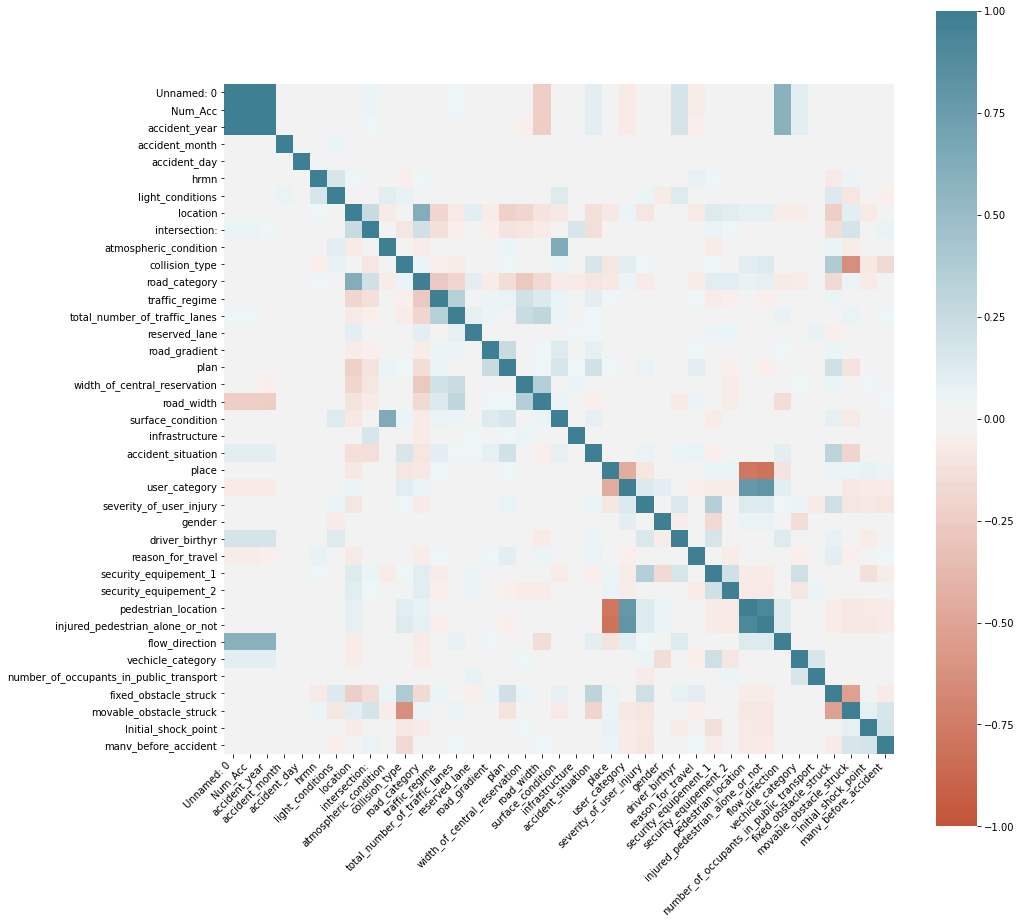

In [20]:
accident_corr = accident_circumstance1.corr(method= 'spearman')
plt.figure(figsize=(15,15))
accident_heatmap = sns.heatmap(accident_corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
accident_heatmap.set_xticklabels(accident_heatmap.get_xticklabels(), rotation=45, horizontalalignment='right');


Text(0.5, 1.0, 'Accident count vs movable obstacle struck')

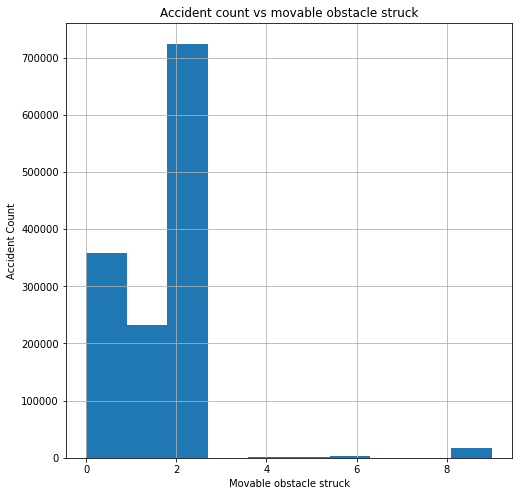

In [21]:
plt.figure(figsize=(8, 8))
accident_circumstance1['movable_obstacle_struck'].hist()
plt.xlabel('Movable obstacle struck')
plt.ylabel('Accident Count')
plt.title("Accident count vs movable obstacle struck")


Text(0.5, 1.0, 'Accident count vs movable obstacle struck')

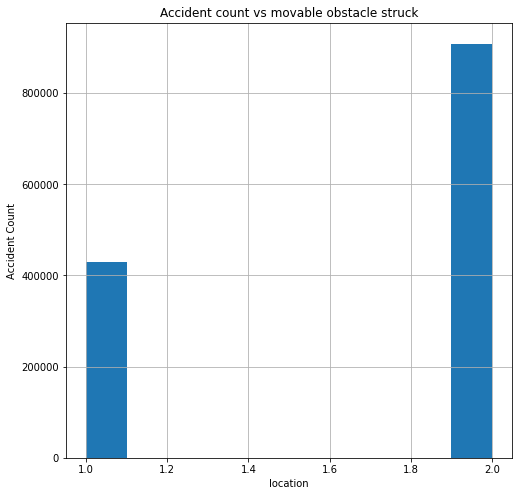

In [22]:
plt.figure(figsize=(8, 8))
accident_circumstance1['location'].hist()
plt.xlabel('location')
plt.ylabel('Accident Count')
plt.title("Accident count vs movable obstacle struck")

Text(0, 0.5, 'Accident Count')

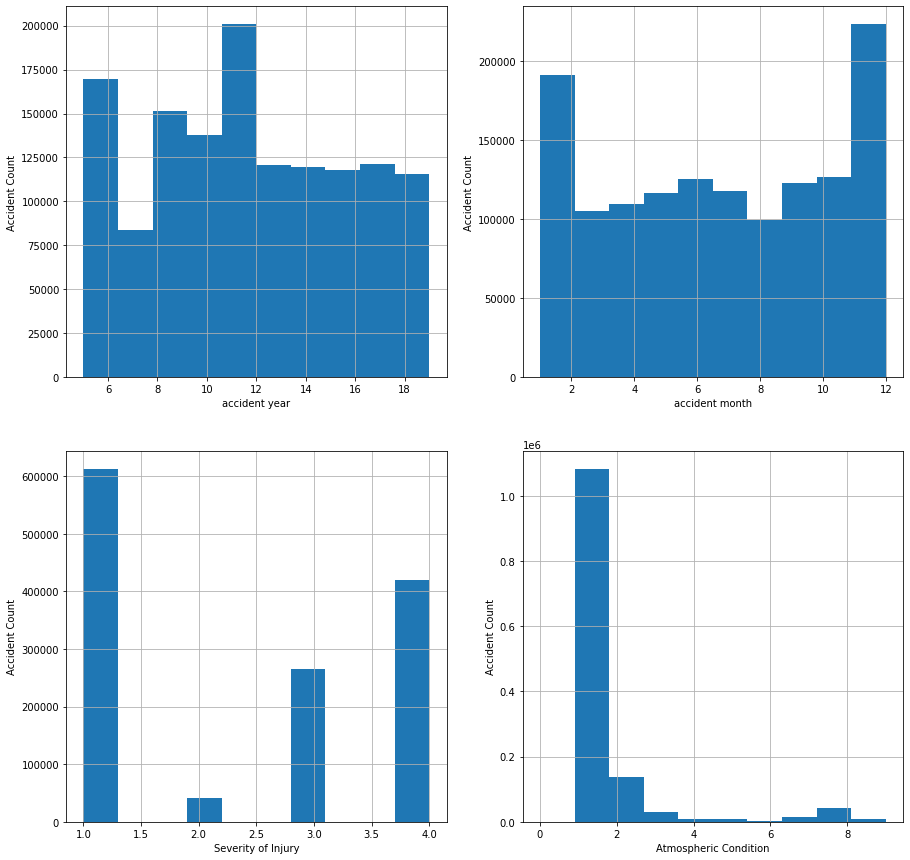

In [23]:
# accident_circumstance1['severity_of_user_injury'].plot.bar(x= 'Severity of Injury', y = 'Accident Count')

# new_ticks = ['Unharmed', 'Killed', 'Injured hospitalized', 'Slightly injured ']
# plt.yticks(accident_circumstance1['severity_of_user_injury'], new_ticks)


plt.figure(figsize=(15, 15))
#Plot 1
plt.subplot(2,2,1)
accident_circumstance1['accident_year'].hist()
plt.xlabel('accident year')
plt.ylabel('Accident Count')

#Plot 2
plt.subplot(2,2,2)
accident_circumstance1['accident_month'].hist()
plt.xlabel('accident month')
plt.ylabel('Accident Count')

#Plot 3
plt.subplot(2,2,3)
accident_circumstance1['severity_of_user_injury'].hist()
plt.xlabel('Severity of Injury')
plt.ylabel('Accident Count')

#Plot 4
plt.subplot(2,2,4)
accident_circumstance1['atmospheric_condition'].hist()
plt.xlabel('Atmospheric Condition')
plt.ylabel('Accident Count')


In [24]:
# accident_circumstance1['severity_of_user_injury'].plot.bar(x= 'Severity of Injury', y = 'Accident Count')

In [25]:
# plt.hist(accident_circumstance1['severity_of_user_injury'], 10)
# plt.xlabel('Severity of Injury')
# plt.ylabel('Accident Count')


In [26]:
# sns.pairplot(accident_circumstance1, x_vars = ['light_conditions', 'atmospheric_condition'], y_vars = 'severity_of_user_injury', height = 7, aspect = 0.7, kind = 'reg')

<Figure size 216000x216000 with 0 Axes>

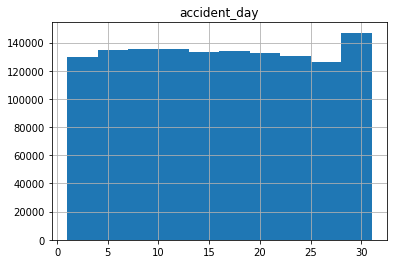

<Figure size 216000x216000 with 0 Axes>

In [27]:

accident_circumstance1[['accident_day']].hist()
plt.figure(figsize=(3000, 3000))

<AxesSubplot:>

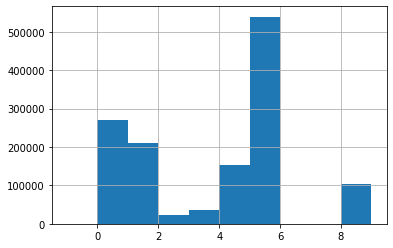

In [28]:
accident_circumstance1['reason_for_travel'].hist()

In [29]:
holiday_patterns = pd.read_csv('holiday_paterns1.csv')

holiday_patterns.dtypes
accident_circumstance1['accident_day'].astype('int64')
accident_circumstance1['accident_month'].astype('int64')

0          1
1          1
2          1
3          1
4          1
          ..
1338194    9
1338195    9
1338196    9
1338197    9
1338198    9
Name: accident_month, Length: 1338199, dtype: int64

In [30]:
holiday_patterns

,month,day,holiday
0,1,1,New year
1,3,28,Easter Monday
2,5,1,Labour Day
3,5,5,Ascension Thursday
4,5,8,Victory in Europe Day
5,5,16,Whit Monday
6,7,14,Bastille Day
7,8,15,Assumption of Mary to Heaven
8,11,1,All Saints Day
9,11,11,Armistice Day


In [31]:
acc_mnthday = accident_circumstance1.groupby(['accident_month', 'accident_day'], as_index = False)['Num_Acc'].count()
acc_mnthdaydf = pd.DataFrame(acc_mnthday)
acc_mnthdaydf.to_csv('acc_mnthdaydf.csv', encoding='utf-8')
acc_mnthdaydf = pd.read_csv('acc_mnthdaydf.csv') 
acc_mnthdaydf

,Unnamed: 0,accident_month,accident_day,Num_Acc
0,0,1,1,2379
1,1,1,2,2409
2,2,1,3,2759
3,3,1,4,3080
4,4,1,5,3241
...,...,...,...,...
361,361,12,27,2521
362,362,12,28,2540
363,363,12,29,2457
364,364,12,30,2401


<AxesSubplot:>

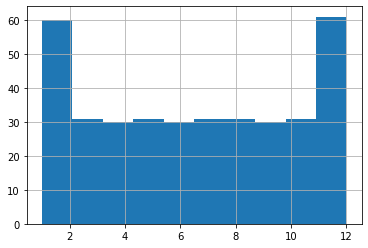

In [32]:
acc_mnthdaydf['accident_month'].hist()

In [33]:
# holiday_patterns['Accident_Count'] = 0

# for i in range(len(holiday_patterns.index)):
#     if holiday_patterns['month'] == acc_mnthdaydf['accident_month'] and holiday_patterns['day'] == acc_mnthdaydf['accident_day']:
#         holiday_patterns['Accident_Count'] = acc_mnthdaydf['Num_Acc']

#         holiday_patterns['Accident_Count']

In [34]:
holiday_patterns['Accident_Count'] = 0

for i in range(len(holiday_patterns.index)):
#     count = 0
    for j in range(len(acc_mnthdaydf.index)):
        if holiday_patterns['month'][i] == acc_mnthdaydf['accident_month'][j]  and holiday_patterns['day'][i] == acc_mnthdaydf['accident_day'][j]:
            holiday_patterns['Accident_Count'][i]= acc_mnthdaydf['Num_Acc']



holiday_patterns        

<ipython-input-34-790b73898b64>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holiday_patterns['Accident_Count'][i]= acc_mnthdaydf['Num_Acc']
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,month,day,holiday,Accident_Count
0,1,1,New year,2379
1,3,28,Easter Monday,2409
2,5,1,Labour Day,2759
3,5,5,Ascension Thursday,3080
4,5,8,Victory in Europe Day,3241
5,5,16,Whit Monday,3282
6,7,14,Bastille Day,3193
7,8,15,Assumption of Mary to Heaven,3168
8,11,1,All Saints Day,3179
9,11,11,Armistice Day,3634


Holiday Patterns

<AxesSubplot:xlabel='holiday'>

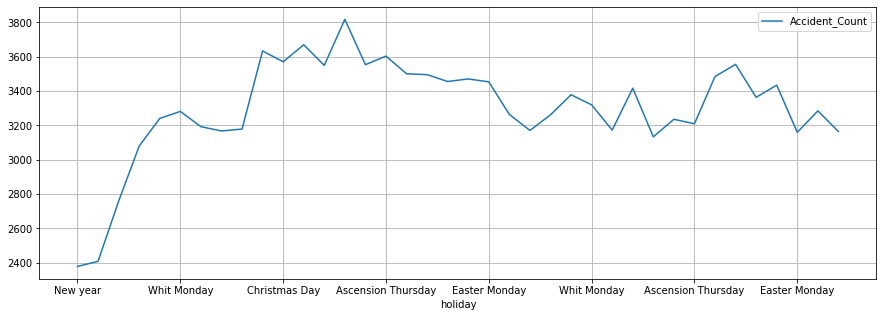

In [35]:
holiday_patterns.plot('holiday', 'Accident_Count', figsize = (15,5), grid= True)

In [36]:
#Mean of each columns in relation to gender, .
monthday_accident = pd.crosstab(index = accident_circumstance1['accident_month'], columns = accident_circumstance1['accident_day'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
monthday_accident

accident_day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
accident_month,,,,,,,,,,,,,,,,,,,,,
1,2379.0,2409.0,2759.0,3080.0,3241.0,3282.0,3193.0,3168.0,3179.0,3634.0,...,3264.0,3171.0,3262.0,3379.0,3320.0,3173.0,3417.0,3134.0,3236.0,3210.0
2,3485.0,3556.0,3364.0,3435.0,3160.0,3285.0,3165.0,3243.0,3346.0,3301.0,...,2875.0,3051.0,2986.0,2877.0,2966.0,2961.0,3083.0,472.0,NaN,NaN
3,3025.0,3353.0,3255.0,3228.0,3249.0,3253.0,3328.0,3494.0,3327.0,3508.0,...,3241.0,3656.0,3471.0,3635.0,3226.0,3340.0,3528.0,3522.0,3496.0,3353.0
4,3683.0,3515.0,3416.0,3423.0,3578.0,4080.0,4028.0,3976.0,3793.0,3720.0,...,3700.0,3496.0,3603.0,3452.0,3422.0,3644.0,3505.0,3578.0,3736.0,NaN
5,2919.0,3430.0,3630.0,3767.0,3935.0,3694.0,3674.0,3001.0,3553.0,3497.0,...,3821.0,4009.0,3937.0,4042.0,3886.0,3958.0,3989.0,3911.0,3960.0,3892.0
6,3875.0,3997.0,3895.0,4073.0,3873.0,4088.0,3982.0,4217.0,4075.0,4327.0,...,4505.0,4194.0,4461.0,4323.0,4341.0,4295.0,4215.0,4378.0,4395.0,NaN
7,4382.0,4286.0,4252.0,4328.0,4388.0,4342.0,4329.0,4028.0,3998.0,3949.0,...,3531.0,3568.0,3467.0,3524.0,3510.0,3480.0,3567.0,3542.0,3446.0,3495.0
8,3472.0,3440.0,3382.0,3365.0,3389.0,3246.0,3156.0,3266.0,2922.0,3207.0,...,3325.0,3296.0,3228.0,3329.0,3238.0,3213.0,3339.0,3329.0,3548.0,3781.0
9,3821.0,3733.0,3799.0,3828.0,3866.0,3886.0,4195.0,4236.0,4170.0,3975.0,...,4339.0,4389.0,4286.0,3957.0,4156.0,4258.0,4337.0,4368.0,4314.0,NaN


<AxesSubplot:xlabel='accident_month'>

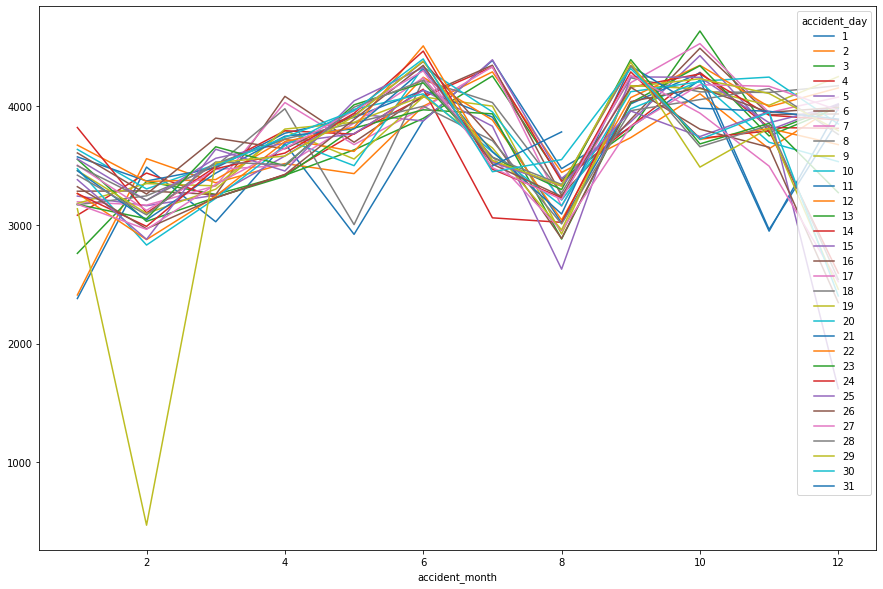

In [37]:
monthday_accident.plot(figsize = (15,10))

<AxesSubplot:>

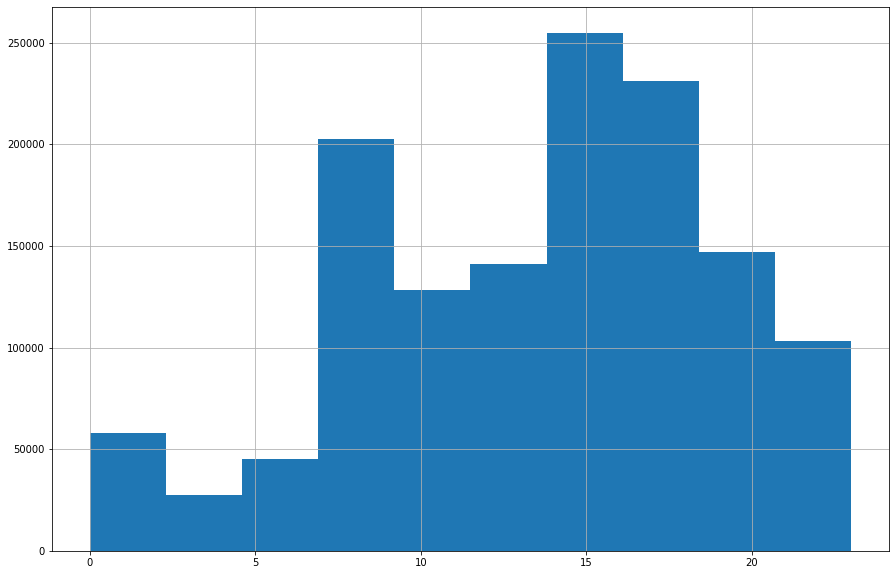

In [38]:
accident_circumstance1['hrmn'].hist(figsize = (15,10))

In [39]:
accident_circumstance1.describe()


,Unnamed: 0,Num_Acc,accident_year,accident_month,accident_day,hrmn,light_conditions,location,intersection:,atmospheric_condition,...,security_equipement_2,pedestrian_location,injured_pedestrian_alone_or_not,flow_direction,vechicle_category,number_of_occupants_in_public_transport,fixed_obstacle_struck,movable_obstacle_struck,Initial_shock_point,manv_before_accident
count,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,...,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06
mean,6.690990e+05,2.011611e+11,1.161083e+01,6.671168e+00,1.560288e+01,1.355021e+01,1.910757e+00,1.678879e+00,1.739850e+00,1.550708e+00,...,1.307412e+00,5.732630e-02,2.518460e-02,2.721636e-01,1.202414e+01,8.925429e-02,1.362037e+00,1.401767e+00,2.774782e+00,6.004224e+00
std,3.863049e+05,3.959885e+08,3.959930e+00,3.382138e+00,8.742317e+00,5.418904e+00,1.511566e+00,4.669074e-01,1.575339e+00,1.592065e+00,...,7.347814e-01,4.590727e-01,1.933534e-01,5.860668e-01,1.166029e+01,2.434234e+00,3.577186e+00,1.261458e+00,2.486622e+00,7.011083e+00
min,0.000000e+00,2.005000e+11,5.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.345495e+05,2.009000e+11,9.000000e+00,4.000000e+00,8.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
50%,6.690990e+05,2.011000e+11,1.100000e+01,7.000000e+00,1.600000e+01,1.400000e+01,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00
75%,1.003648e+06,2.015000e+11,1.500000e+01,1.000000e+01,2.300000e+01,1.800000e+01,3.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,2.000000e+00,4.000000e+00,1.300000e+01
max,1.338198e+06,2.019000e+11,1.900000e+01,1.200000e+01,3.100000e+01,2.300000e+01,5.000000e+00,2.000000e+00,9.000000e+00,9.000000e+00,...,9.000000e+00,9.000000e+00,3.000000e+00,3.000000e+00,9.900000e+01,9.000000e+02,1.600000e+01,9.000000e+00,9.000000e+00,2.600000e+01


In [40]:
accident_circumstance1['driver_birthyr'].describe()

count    1.338199e+06
mean     1.971218e+03
std      6.157965e+01
min      0.000000e+00
25%      1.962000e+03
50%      1.976000e+03
75%      1.986000e+03
max      2.017000e+03
Name: driver_birthyr, dtype: float64

In [41]:
accident_circumstance1['driver_birthyr'].mode()

0    1987.0
dtype: float64

In [42]:
#Mean of each columns in relation to accident year.
pd.pivot_table(accident_circumstance1, index = ['accident_year', 'severity_of_user_injury'])
# Severity of user injury
# 	1. Unharmed
# 	2. Killed
# 	3. Injured hospitalized
# 	4. Slightly injured 

Initial_shock_point       Num_Acc  \
accident_year severity_of_user_injury                                      
5             1                                   2.667570  2.005000e+11   
              2                                   3.176945  2.005000e+11   
              3                                   2.625390  2.005000e+11   
              4                                   2.497674  2.005000e+11   
6             1                                   2.744634  2.006000e+11   
              2                                   3.247619  2.006000e+11   
              3                                   2.681914  2.006000e+11   
              4                                   2.476900  2.006000e+11   
7             1                                   2.790193  2.007000e+11   
              2                                   3.191673  2.007000e+11   
              3                                   2.660937  2.007000e+11   
              4                                   2.540038  2.007000e+11   
8             1                                   2.787008  2.008000e+11   
              2                                   3.098985  2.008000e+11   
              3                                   2.709371  2.008000e+11   
              4                                   2.639660  2.008000e+11   
9             1                                   3.007112  2.009000e+11   
              2                                   3.102994  2.009000e+11   
              3                                   2.673832  2.009000e+11   
              4                                   2.689520  2.009000e+11   
10            1                                   2.881095  2.010000e+11   
              2                                   3.362170  2.010000e+11   
              3                                   2.737755  2.010000e+11   
              4                                   2.771645  2.010000e+11   
11            1                                   2.900497  2.011000e+11   
              2                                   3.224337  2.011000e+11   
              3                                   2.749563  2.011000e+11   
              4                                   2.815680  2.011000e+11   
12            1                                   2.842682  2.012000e+11   
              2                                   2.955626  2.012000e+11   
              3                                   2.754407  2.012000e+11   
              4                                   2.805042  2.012000e+11   
13            1                                   2.813732  2.013000e+11   
              2                                   3.126718  2.013000e+11   
              3                                   2.703189  2.013000e+11   
              4                                   2.785679  2.013000e+11   
14            1                                   2.821808  2.014000e+11   
              2                                   2.984270  2.014000e+11   
              3                                   2.665719  2.014000e+11   
              4                                   2.764486  2.014000e+11   
15            1                                   2.756907  2.015000e+11   
              2                                   2.988340  2.015000e+11   
              3                                   2.663781  2.015000e+11   
              4                                   2.788415  2.015000e+11   
16            1                                   2.754471  2.016000e+11   
              2                                   2.866410  2.016000e+11   
              3                                   2.578777  2.016000e+11   
              4                                   2.757322  2.016000e+11   
17            1                                   2.804137  2.017000e+11   
              2                                   2.889129  2.017000e+11   
              3                                   2.701471  2.017000e+11   
           

In [43]:
#Accident Year and Gender.
gender_accident = pd.crosstab(index = accident_circumstance1['accident_year'], columns = accident_circumstance1['gender'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
gender_accident



gender,1,2
accident_year,,
5,65072,21866
6,61300,21517
7,61465,22253
8,55831,20934
9,51368,23039
10,100736,36960
11,147525,53394
12,45735,16515
13,42576,15820


<AxesSubplot:xlabel='accident_year'>

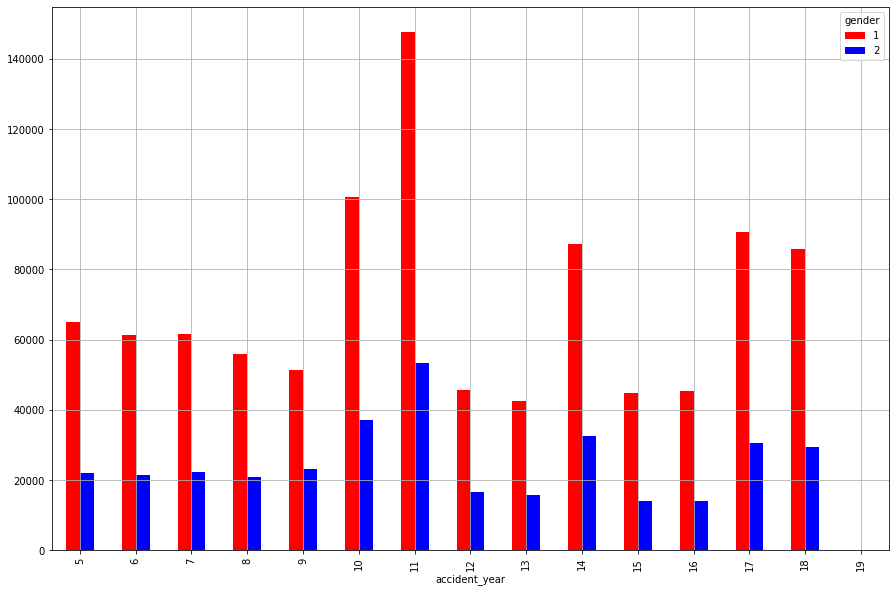

In [44]:
# gender_accident.hist()
gender_accident.plot(kind='bar', stacked=False, color=['red','blue'], grid= True, figsize = (15,10))
# try to see what proportion of male and female accident in a year---not able to

In [45]:
Age = pd.crosstab(index = accident_circumstance1['driver_birthyr'], columns = accident_circumstance1['severity_of_user_injury'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
Age

severity_of_user_injury,1,2,3,4
driver_birthyr,,,,
0.0,498.0,63.0,415.0,229.0
1898.0,5.0,1.0,1.0,6.0
1899.0,NaN,NaN,1.0,1.0
1900.0,24.0,NaN,9.0,15.0
1901.0,10.0,NaN,4.0,1.0
...,...,...,...,...
2013.0,NaN,NaN,15.0,22.0
2014.0,4.0,2.0,11.0,37.0
2015.0,1.0,1.0,5.0,14.0


In [46]:
travel_reason = pd.crosstab(index = accident_circumstance1['severity_of_user_injury'], columns = accident_circumstance1['reason_for_travel'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero).apply(lambda r: r/r.sum(), axis=1)
travel_reason

reason_for_travel,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,9.0
severity_of_user_injury,,,,,,,,
1,NaN,0.205004,0.139979,0.013201,0.032829,0.164033,0.366140,0.078815
2,NaN,0.110746,0.134238,0.010362,0.032629,0.045293,0.579502,0.087230
3,NaN,0.167721,0.161337,0.017740,0.026992,0.052210,0.501981,0.072019
4,0.000002,0.230571,0.184649,0.021980,0.018040,0.087748,0.377562,0.079448


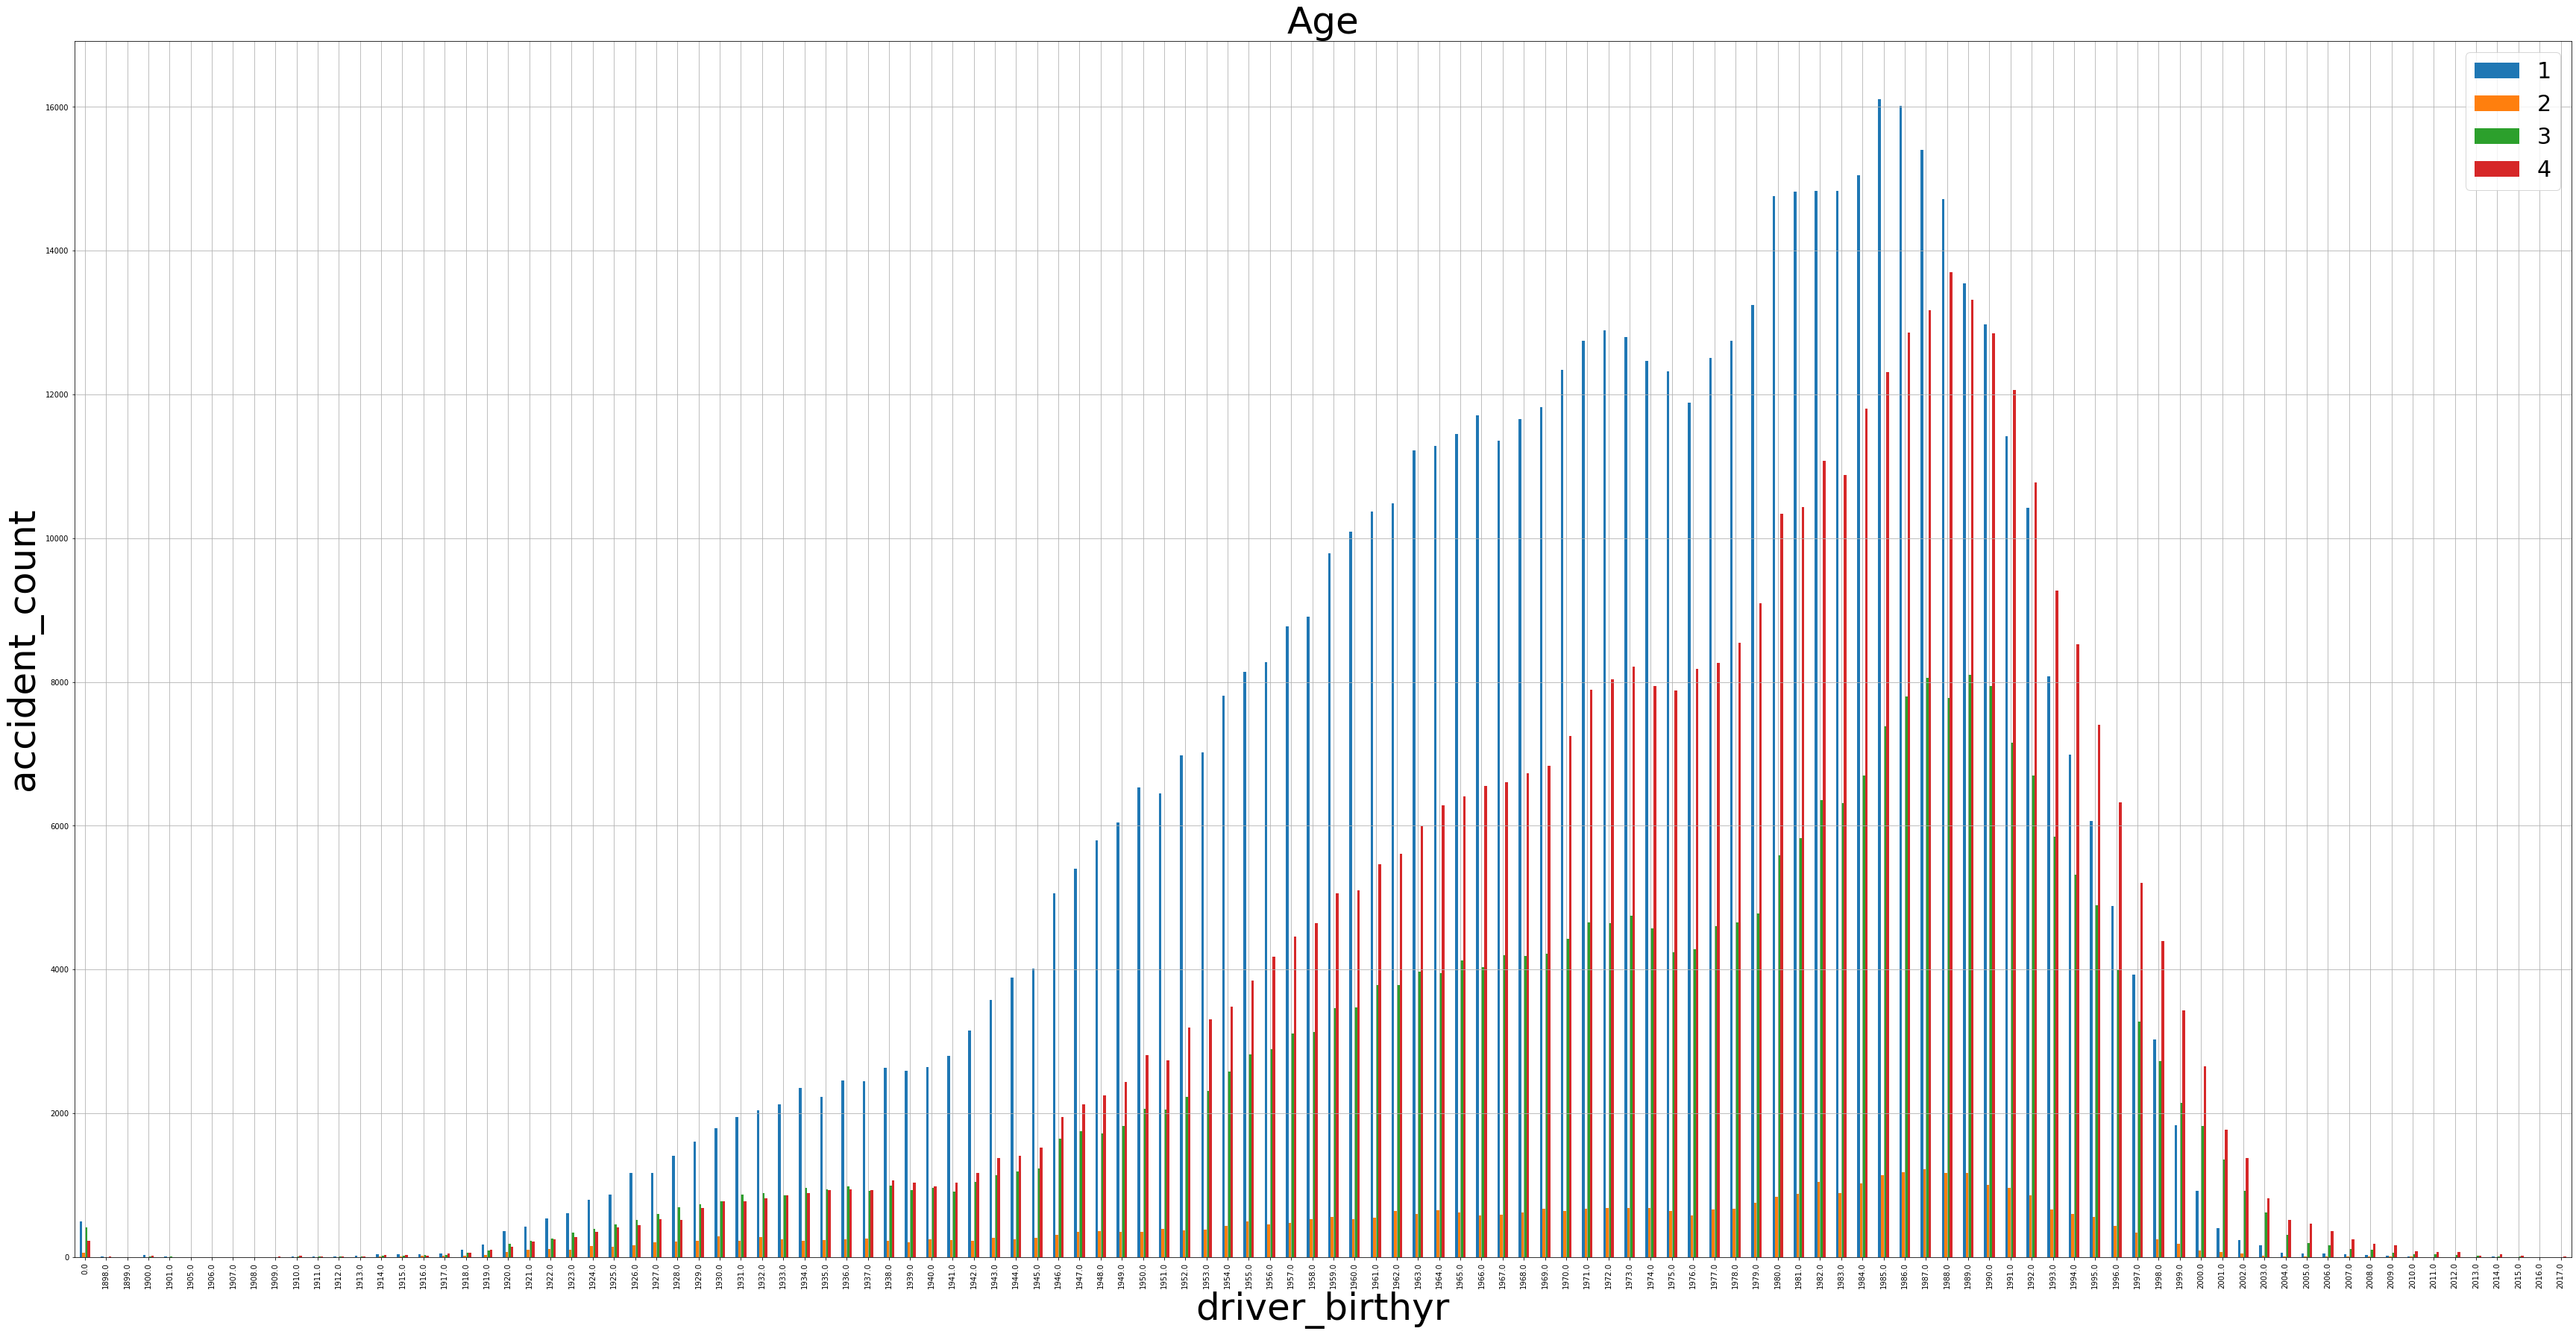

In [47]:
Age.plot(kind='bar', figsize=(60, 30), grid= True)
plt.title('Age', fontsize=50)
plt.xlabel('driver_birthyr', fontsize = 50)
plt.ylabel('accident_count', fontsize = 50)
plt.legend(fontsize =30)

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>]], dtype=object)

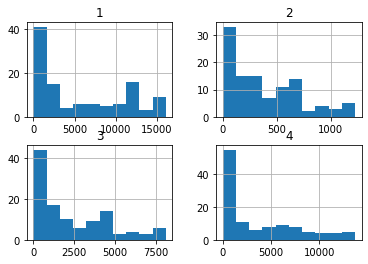

In [48]:
Age.hist()

<AxesSubplot:xlabel='severity_of_user_injury'>

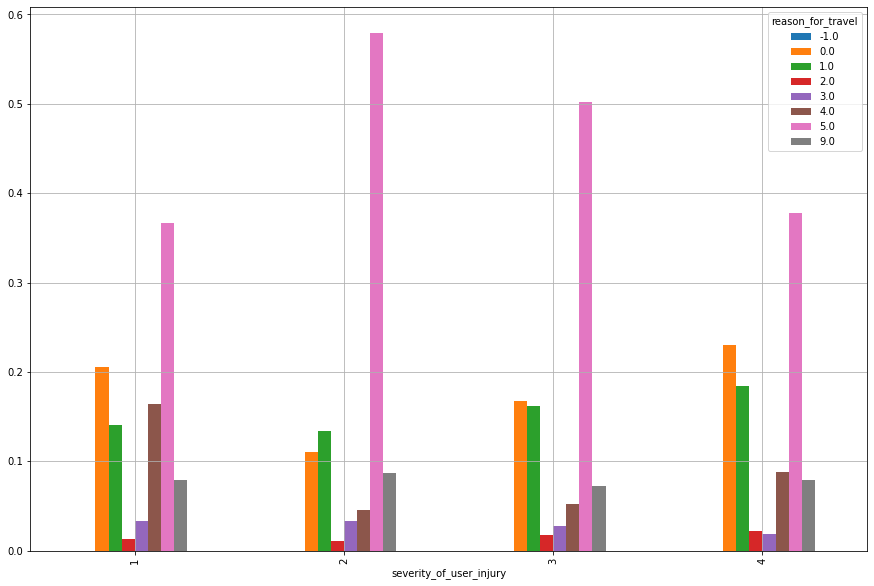

In [49]:
travel_reason.plot(kind='bar', stacked=False, grid= True, figsize = (15,10))
# Try plotting proportion, change legend from numbers to strings, add titles


In [50]:
road_condition = pd.crosstab(index = accident_circumstance1['traffic_regime'], columns = accident_circumstance1['road_category'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero).apply(lambda r: r/r.sum(), axis=1)
road_condition
# Road category:
# 	1. Highway
# 	2. National road
# 	3. Departmental road
# 	4. Communal roads
# 	5. Outside the public network
# 	6. Parking lot open to public traffic
# 	7. Urban metropolis roads
# 	9. other

# Surface condition: 
# 	-1. Not specified
# 	1. Normal
# 	2. Wet
# 	3. Puddles
# 	4. Flooded
# 	5. Snowy
# 	6. Mud
# 	7. Icy
# 	8. Fat. oil
# 	9. Other

road_category,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,9.0
traffic_regime,,,,,,,,,
-1.0,NaN,NaN,0.062500,0.125000,0.625000,NaN,0.187500,NaN,NaN
0.0,NaN,0.047445,0.047347,0.236459,0.520891,0.011910,0.081480,0.000694,0.053774
1.0,NaN,0.134418,0.059199,0.098825,0.684319,0.001508,0.005314,0.000845,0.015572
2.0,0.000001,0.002004,0.059108,0.421649,0.497596,0.001335,0.001964,0.000520,0.015823
3.0,NaN,0.369656,0.185117,0.189618,0.247715,0.000388,0.000268,0.000548,0.006689
4.0,NaN,0.030542,0.084431,0.331750,0.496267,0.005565,0.022126,0.001629,0.027691


<AxesSubplot:xlabel='traffic_regime'>

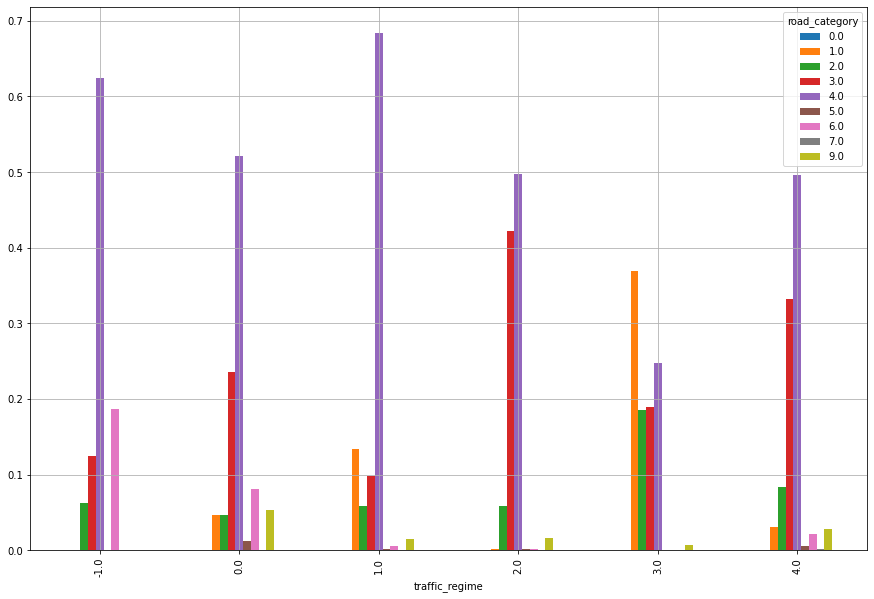

In [51]:
road_condition.plot(kind='bar', stacked=False, grid= True, figsize = (15,10))

In [52]:
# pd.pivot_table(accident_circumstance1, index='accident_year', columns=['surface_condition', 'traffic_regime', 'total_number_of_traffic_lanes', 'road_gradient', 
#                                                                        'accident_situation', 'reason_for_travel', 'security_equipement_1', 'security_equipement_2', 
#                                                                     'fixed_obstacle_struck', 'movable_obstacle_struck', 'Initial_shock_point'], values='Num_Acc', aggfunc='count', fill_value=0)

<AxesSubplot:xlabel='accident_year'>

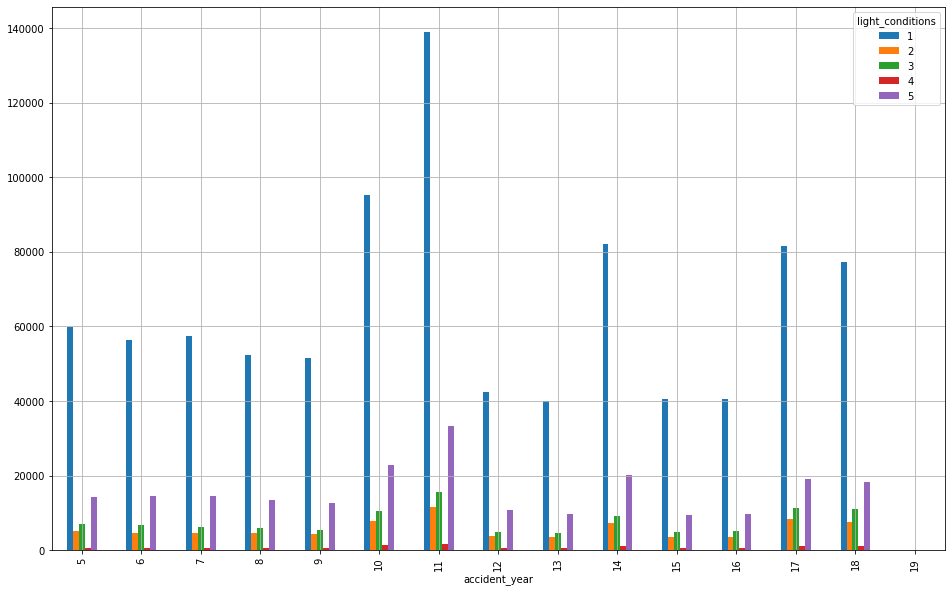

In [53]:
light_cond = pd.crosstab(index = accident_circumstance1['accident_year'], columns = accident_circumstance1['light_conditions'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
light_cond.plot(kind='bar', stacked=False, grid= True, figsize = (16,10))

<AxesSubplot:xlabel='accident_year'>

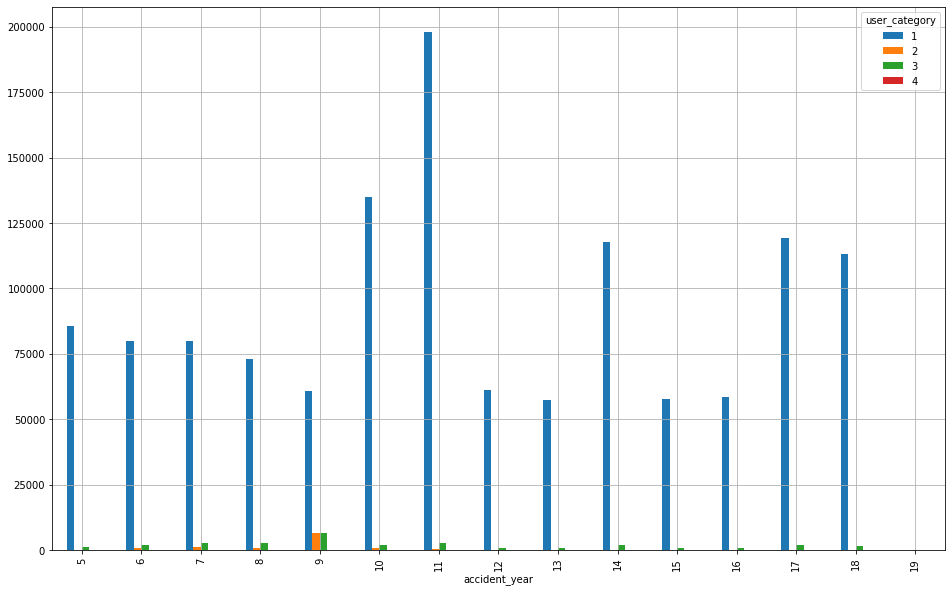

In [54]:
light_cond = pd.crosstab(index = accident_circumstance1['accident_year'], columns = accident_circumstance1['user_category'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
light_cond.plot(kind='bar', stacked=False, grid= True, figsize = (16,10))

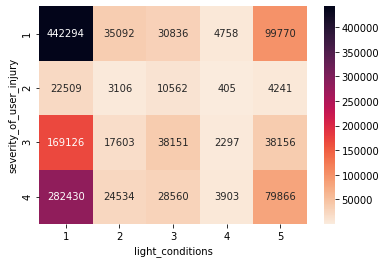

In [55]:
crs=pd.crosstab(index = accident_circumstance1['severity_of_user_injury'], columns = accident_circumstance1['light_conditions'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
# Determing what dataset are ordinal and discrete. 
sns.heatmap(crs, cmap='rocket_r', annot=True, fmt='g');

# grav
# Severity of user injury, injured users are classified into three categories of
# victims plus unharmed:
# 	1. Unharmed
# 	2. Killed
# 	3. Injured hospitalized
# 	4. Slightly injured 


# lum
# Light: lighting conditions in which the accident occurred:
# 	1. Full day
# 	2. Twilight or dawn
# 	3. Night without public lighting
# 	4. Night with public lighting not on
# 	5. Night with public lighting on

In [56]:
# Mann–Whitney–Wilcoxon (MWW)-- use this for testing null hypothesis
# Box plot for testing normalization
# Non parametric for null hypothesis
# Spearman for correlation
# Remove null values
# Accident severity calculation
# change 2019 to 19


# Thank you for addressing all the review comments from the draft proposal and submitting an excellent proposal. 
# I see one major issue that is not mentioned in the proposal. You do not mention any evaluation metrics for your regression 
# or classification model performance. For e.g.
# I'd use F1 scores for classification and RMSE and MAPE for the time series forecasting. 
# In addition, the deliverables should include respective visualizations - 
# ROC plot for classification performance and time series regression plots with error bars.
# Overall, I am excited to see the results of your analysis and the presentation of the results.


In [57]:
print(accident_circumstance1.columns.tolist())

['Unnamed: 0', 'Num_Acc', 'accident_year', 'accident_month', 'accident_day', 'hrmn', 'light_conditions', 'location', 'intersection:', 'atmospheric_condition', 'collision_type', 'municipality', 'latitude', 'longitude', 'dept', 'road_category', 'route_number', 'traffic_regime', 'total_number_of_traffic_lanes', 'reserved_lane', 'road_gradient', 'upstream_terminal', 'dist_from_upstream_terminal', 'plan', 'width_of_central_reservation', 'road_width', 'surface_condition', 'infrastructure', 'accident_situation', 'num_veh_x', 'place', 'user_category', 'severity_of_user_injury', 'gender', 'driver_birthyr', 'reason_for_travel', 'security_equipement_1', 'security_equipement_2', 'pedestrian_location', 'pedestrian_action', 'injured_pedestrian_alone_or_not', 'flow_direction', 'vechicle_category', 'number_of_occupants_in_public_transport', 'fixed_obstacle_struck', 'movable_obstacle_struck', 'Initial_shock_point', 'manv_before_accident', 'num_veh_y']


In [58]:
pip install scikit-plot

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Data Prep for classification-


# MODELS

In [59]:
#Converting accident severity to low and high
accident_circumstance1['severity_of_user_injury'].replace([1, 4], 1, inplace = True) # low severity
accident_circumstance1['severity_of_user_injury'].replace([2, 3], 2, inplace = True) # High Severity
accident_circumstance1['severity_of_user_injury']

0          1
1          1
2          1
3          2
4          2
          ..
1338194    1
1338195    1
1338196    1
1338197    1
1338198    1
Name: severity_of_user_injury, Length: 1338199, dtype: int64

random sample of items

In [60]:
df_sample = accident_circumstance1.sample(frac=0.80)
df_sample

,Unnamed: 0,Num_Acc,accident_year,accident_month,accident_day,hrmn,light_conditions,location,intersection:,atmospheric_condition,...,pedestrian_action,injured_pedestrian_alone_or_not,flow_direction,vechicle_category,number_of_occupants_in_public_transport,fixed_obstacle_struck,movable_obstacle_struck,Initial_shock_point,manv_before_accident,num_veh_y
1155597,1155597,201700027079,17,2,4,16.0,1,2,3,1.0,...,0.0,0.0,2.0,30,0.0,0.0,2.0,1.0,1.0,A01
538130,538130,201000067226,10,11,18,17.0,1,2,1,1.0,...,0,0.0,0.0,31,0.0,0.0,2.0,3.0,3.0,A01
891229,891229,201400013662,14,8,12,9.0,1,2,2,1.0,...,0.0,0.0,0.0,7,0.0,0.0,2.0,1.0,1.0,B01
140132,140132,200600053356,6,9,23,21.0,5,2,1,1.0,...,0,0.0,0.0,7,0.0,9.0,0.0,1.0,14.0,A01
808,808,200500000809,5,1,21,18.0,5,2,1,2.0,...,0,0.0,0.0,7,0.0,0.0,2.0,7.0,15.0,A01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166019,1166019,201700032290,17,5,13,0.0,5,2,1,1.0,...,0.0,0.0,1.0,7,0.0,1.0,2.0,2.0,17.0,A01
1268618,1268618,201800022986,18,3,19,19.0,5,2,1,2.0,...,0.0,0.0,1.0,7,0.0,0.0,2.0,1.0,2.0,A01
960123,960123,201400048109,14,5,12,16.0,1,1,1,2.0,...,0.0,0.0,0.0,7,0.0,0.0,2.0,1.0,2.0,A01
161958,161958,200600075188,6,12,4,0.0,5,2,1,1.0,...,0,0.0,0.0,32,0.0,1.0,0.0,1.0,1.0,A01


Test Split = xTrain, xTest, yTrain, yTest

In [61]:
xTrain, xTest, yTrain, yTest = train_test_split(df_sample[['accident_year','hrmn','accident_month', 'accident_day', 'light_conditions', 'location', 'intersection:', 'atmospheric_condition', 'collision_type',
                                                                        'road_category', 'traffic_regime', 'total_number_of_traffic_lanes', 'reserved_lane','infrastructure', 'accident_situation', 'user_category',
                                                                        'gender', 'injured_pedestrian_alone_or_not', 'flow_direction', 'vechicle_category', 'number_of_occupants_in_public_transport',  
                                                                        'movable_obstacle_struck', 'Initial_shock_point', 'manv_before_accident', 'road_gradient', 
                                                                          'plan', 'width_of_central_reservation', 'road_width','surface_condition', 'driver_birthyr', 
                                                                        'reason_for_travel', 'security_equipement_1', 'security_equipement_2', 'pedestrian_location']],
                                                df_sample["severity_of_user_injury"], test_size=0.25, random_state=0)


Logistic Regression- Injury Severity

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

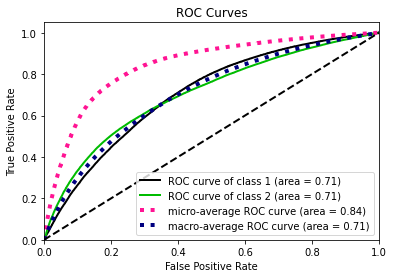

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import scikitplot


logReg = LogisticRegression()
logReg.fit(xTrain, yTrain)
log_regre_predicted = linear_model.LogisticRegression().fit(xTrain, yTrain).predict_proba(xTest)
scikitplot.metrics.plot_roc(yTest, log_regre_predicted)
plt.show()

In [63]:
predictions = logReg.predict(xTest)

In [64]:
from sklearn import metrics
print("Accuracy Logistic Regression:", logReg.score(xTest, yTest))

Accuracy Logistic Regression: 0.7783589896876402


Random Forest Classifier

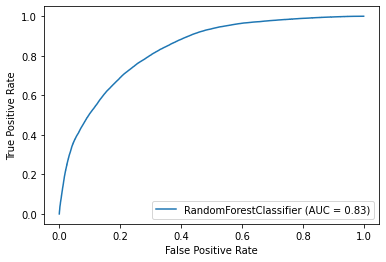

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import  metrics 

rfc = RandomForestClassifier(n_estimators=1000, max_depth=5, class_weight='balanced')

rfc.fit(xTrain, yTrain)

metrics.plot_roc_curve(rfc, xTest, yTest) 

plt.show()


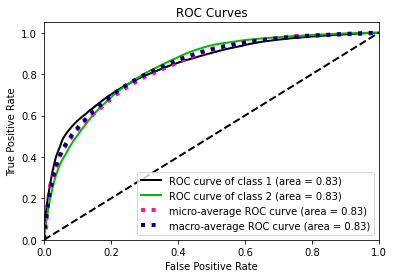

In [66]:
rfc_pred = rfc.fit(xTrain, yTrain).predict_proba(xTest)
scikitplot.metrics.plot_roc(yTest, rfc_pred)
plt.show()

In [67]:
rfc_predicted = rfc.predict(xTest)

In [68]:
from sklearn import metrics
print("Accuracy of Random Forest:",metrics.accuracy_score(yTest, rfc_predicted))

Accuracy of Random Forest: 0.7446159019578539


Feature Importance from RadomFrorestClassifier

In [69]:
feature_imp = pd.Series(rfc.feature_importances_,index=xTrain.columns.tolist()).sort_values(ascending=False)
feature_imp

movable_obstacle_struck                    0.180741
location                                   0.176326
security_equipement_1                      0.142021
road_category                              0.137674
vechicle_category                          0.074498
collision_type                             0.055544
accident_situation                         0.044438
plan                                       0.042720
total_number_of_traffic_lanes              0.024053
traffic_regime                             0.021541
reason_for_travel                          0.013723
intersection:                              0.013531
Initial_shock_point                        0.010965
manv_before_accident                       0.008750
user_category                              0.007552
road_width                                 0.006751
hrmn                                       0.006251
injured_pedestrian_alone_or_not            0.006170
security_equipement_2                      0.006082
pedestrian_l

No handles with labels found to put in legend.


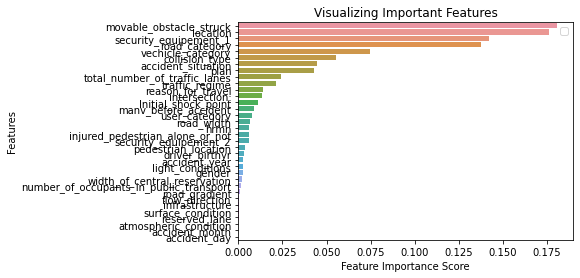

<Figure size 2160x2160 with 0 Axes>

In [70]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.figure(figsize=(30,30))
plt.show()

<AxesSubplot:title={'center':'Visualizing Important Features'}, ylabel='Features'>

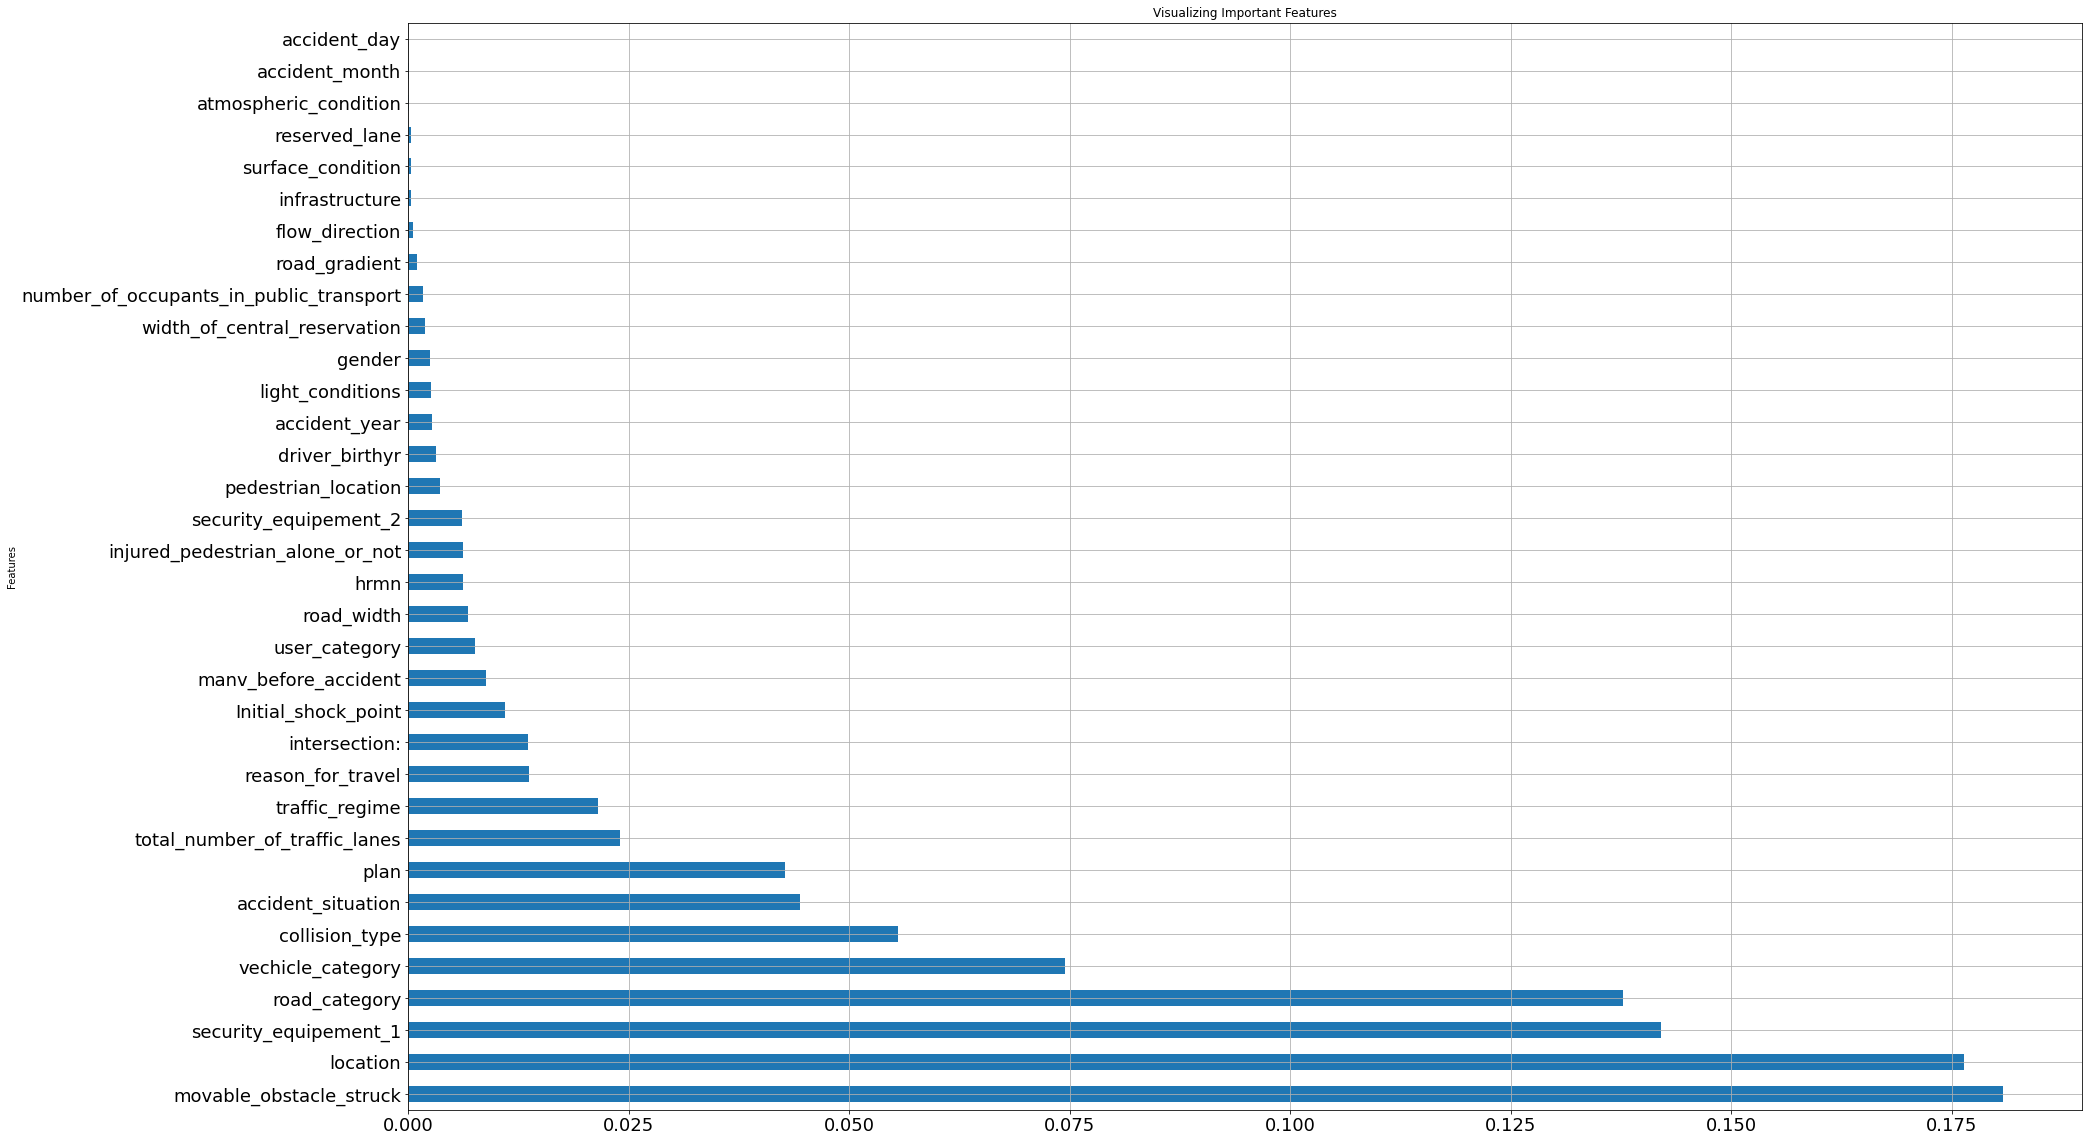

In [71]:
feature_imp.plot(kind='barh', stacked=False, grid= True, figsize = (30,20), 
                 title ="Visualizing Important Features", ylabel = 'Feature Importance Score', xlabel = 'Features', fontsize = 18 )

Linear Regression- Performing Linear Regression on continous factor variables,

In [72]:
xTrain, xTest, yTrain, yTest = train_test_split(accident_circumstance1[['hrmn', 'driver_birthyr', 'accident_day', 
                                                                        'accident_year','road_width']],
                                                accident_circumstance1["severity_of_user_injury"], test_size = 0.80)


In [73]:
print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

(267639, 5) (1070560, 5) (267639,) (1070560,)


In [74]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(xTrain, yTrain)
linreg_predicted = linreg.predict(xTest)
linreg_expected = yTrain


In [75]:
print(linreg.score(xTest, yTest))

0.0008081157353929669


The accuracy score of the model is very low, this measns that the model does not fitted for linear regression

Extreme Gradient Boost (XGBoost)

In [76]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold


In [77]:
xTrain, xTest, yTrain, yTest = train_test_split(df_sample[['accident_year','hrmn','accident_month', 'accident_day', 'light_conditions', 'location', 'intersection:', 'atmospheric_condition', 'collision_type',
                                                                        'road_category', 'traffic_regime', 'total_number_of_traffic_lanes', 'reserved_lane','infrastructure', 'accident_situation', 'user_category',
                                                                        'gender', 'injured_pedestrian_alone_or_not', 'flow_direction', 'vechicle_category', 'number_of_occupants_in_public_transport',  
                                                                        'movable_obstacle_struck', 'Initial_shock_point', 'manv_before_accident', 'road_gradient', 
                                                                          'plan', 'width_of_central_reservation', 'road_width','surface_condition', 'driver_birthyr', 
                                                                        'reason_for_travel', 'security_equipement_1', 'security_equipement_2', 'pedestrian_location']],
                                                df_sample["severity_of_user_injury"], test_size=0.25, random_state=0)


In [78]:
xgbclassifier = XGBClassifier()
xgbclassifier.fit(xTrain, yTrain)
xgboost_pred = xgbclassifier.predict(xTest)
scores = cross_val_score(xgbclassifier, xTrain, yTrain, cv=5)
rmse = np.sqrt(mean_squared_error(yTest, xgboost_pred))

print("RMSE: %f" % (rmse))
print("Mean cross-validation score: %.2f" % scores.mean())

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:41:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:41:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:41:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [79]:
from sklearn import metrics
print("Accuracy of XGBoost:",metrics.accuracy_score(yTest, xgboost_pred))

Accuracy of XGBoost: 0.8425571663428486


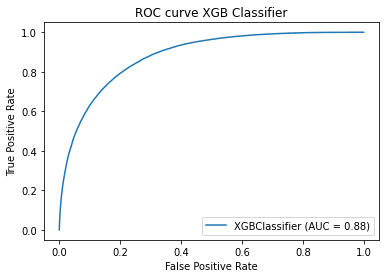

In [80]:
metrics.plot_roc_curve(xgbclassifier, xTest, yTest) 
plt.title("ROC curve XGB Classifier")
plt.show()

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


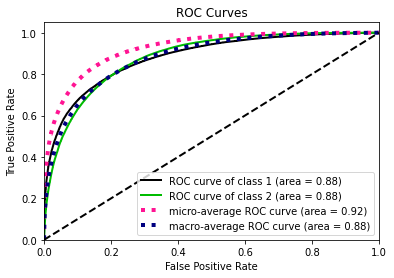

In [81]:
xgboost_pred1 = xgbclassifier.fit(xTrain, yTrain).predict_proba(xTest)

scikitplot.metrics.plot_roc(yTest, xgboost_pred1)
plt.show()

<AxesSubplot:title={'center':'Random Forest Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

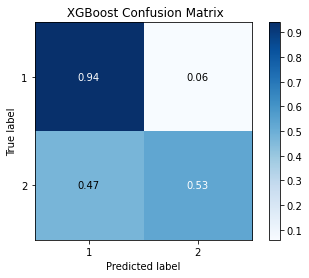

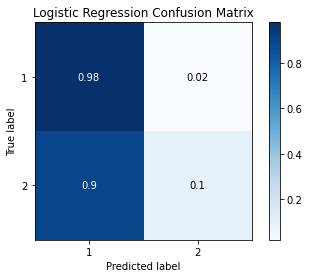

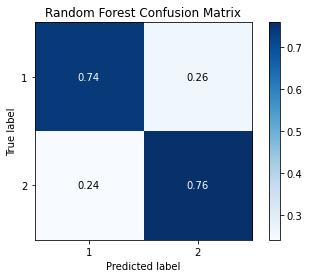

In [82]:
scikitplot.metrics.plot_confusion_matrix(yTest, xgboost_pred, normalize=True, title = ' XGBoost Confusion Matrix' ) #xgboost


scikitplot.metrics.plot_confusion_matrix(yTest, predictions, normalize=True, title = 'Logistic Regression Confusion Matrix') #logistic regression


scikitplot.metrics.plot_confusion_matrix(yTest, rfc_predicted, normalize=True, title = 'Random Forest Confusion Matrix') #Random Forest


ROC Curves for Data Models

<Figure size 1080x1080 with 0 Axes>

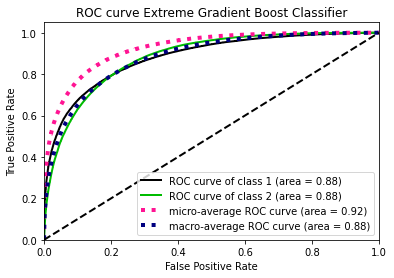

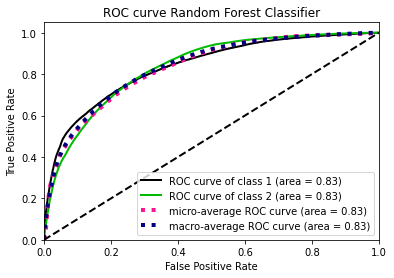

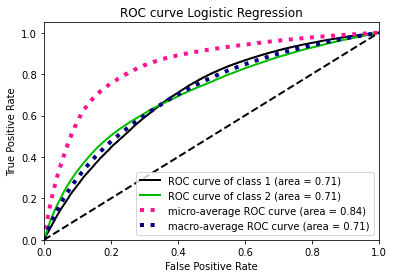

In [83]:
plt.figure(figsize=(15, 15))


#Plot 1
scikitplot.metrics.plot_roc(yTest, xgboost_pred1)
plt.title("ROC curve Extreme Gradient Boost Classifier")


#Plot 2
scikitplot.metrics.plot_roc(yTest, rfc_pred)
plt.title("ROC curve Random Forest Classifier")


#Plot 3
scikitplot.metrics.plot_roc(yTest, log_regre_predicted)
# metrics.plot_roc_curve(predictions, xTest, yTest)
plt.title("ROC curve Logistic Regression")


plt.show()

Feature Importance XGBoost

In [84]:
feature_imp = pd.Series(xgbclassifier.feature_importances_,index=xTrain.columns.tolist()).sort_values(ascending=False)
feature_imp

location                                   0.229257
security_equipement_1                      0.145051
movable_obstacle_struck                    0.130503
road_category                              0.066994
user_category                              0.059019
collision_type                             0.046335
security_equipement_2                      0.035004
accident_situation                         0.031554
total_number_of_traffic_lanes              0.030848
traffic_regime                             0.028518
manv_before_accident                       0.017648
vechicle_category                          0.016331
gender                                     0.014422
Initial_shock_point                        0.014281
reason_for_travel                          0.013214
number_of_occupants_in_public_transport    0.011479
plan                                       0.010440
driver_birthyr                             0.008801
intersection:                              0.008427
light_condit

No handles with labels found to put in legend.


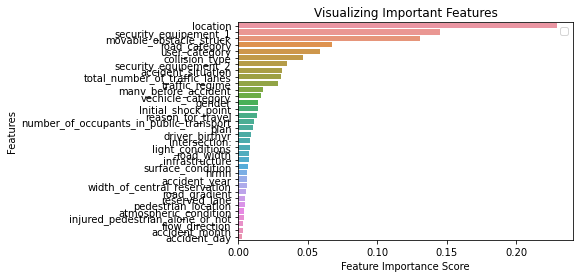

<Figure size 2160x2160 with 0 Axes>

In [85]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.figure(figsize=(30,30))
plt.show()

<AxesSubplot:title={'center':'Visualizing Important Features'}, ylabel='Features'>

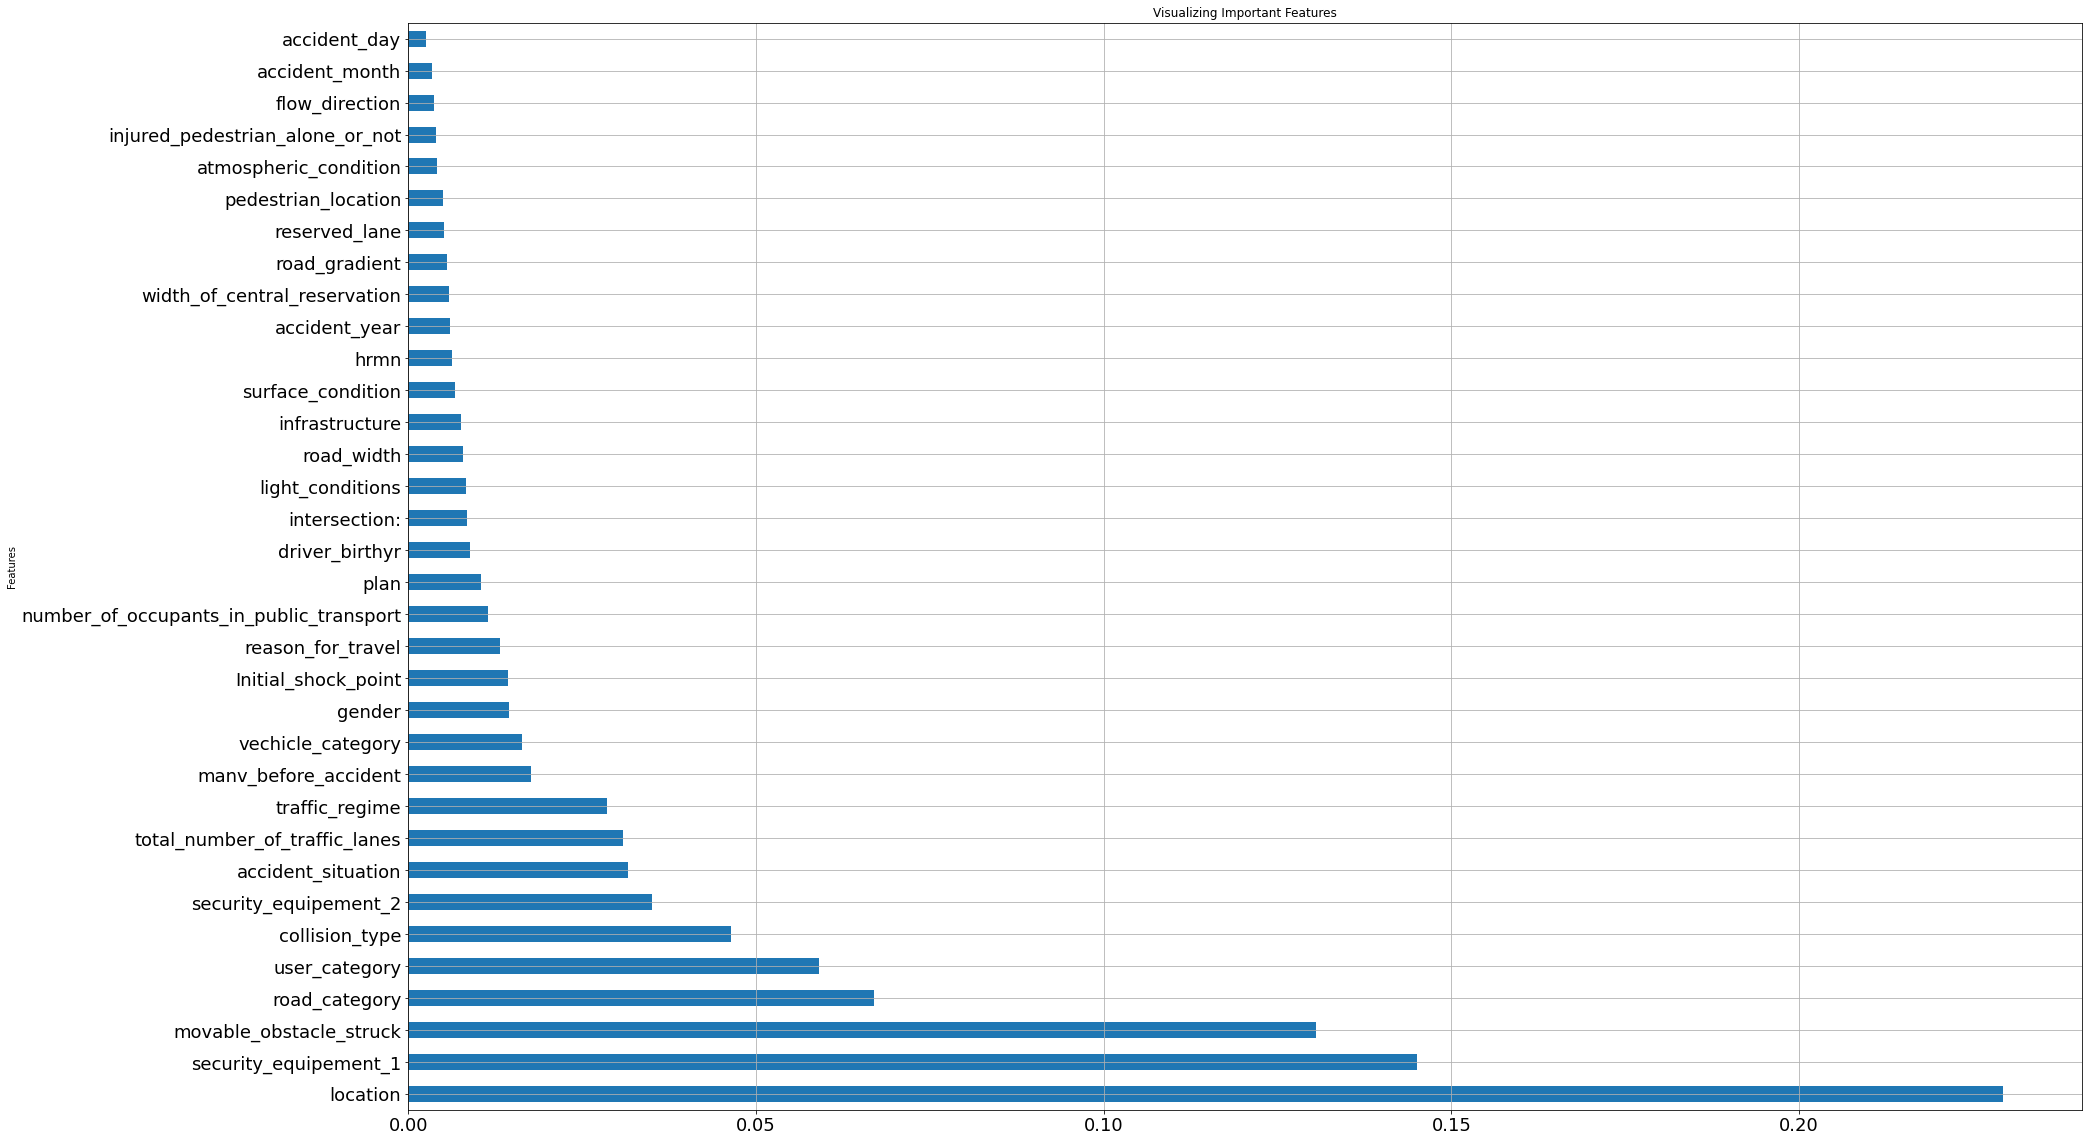

In [86]:
feature_imp.plot(kind='barh', stacked=False, grid= True, figsize = (30,20), fontsize = 18,
                 title ="Visualizing Important Features", ylabel = 'Feature Importance Score', xlabel = 'Features' )

In [87]:
# # Train and test set are converted to DMatrix objects,
# # as it is required by learning API.
# train_dmatrix = xgb.DMatrix(data = xTrain, label = yTrain)
# test_dmatrix = xgb.DMatrix(data = xTest, label = yTest)

# # Parameter dictionary specifying base learner
# # param = {"booster":"gblinear", "objective":"reg:linear"}
  
# xgb_r = xgb.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
# xgb_pred = xgb_r.predict(test_dmatrix)
  
# # RMSE Computation
# rmse = np.sqrt(mean_squared_error(yTest, xgb_pred))
# print("RMSE : % f" %(rmse))

In [88]:

predictions.shape

(267640,)

Classification Performance

In [89]:
yTest.shape

(267640,)

In [90]:
rfc_predicted.shape

(267640,)

In [91]:
xgboost_pred.shape

(267640,)

In [92]:
predictions = logReg.predict(xTest)

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(yTest, predictions))
print("Logistic regression RMSE: %f" % (rmse))

rmse = np.sqrt(mean_squared_error(yTest, rfc_predicted))
print("Random Forest Classifier RMSE: %f" % (rmse))

rmse = np.sqrt(mean_squared_error(yTest, xgboost_pred))
print("XGBoost RMSE: %f" % (rmse))


Logistic regression RMSE: 0.470788
Random Forest Classifier RMSE: 0.505355
XGBoost RMSE: 0.396791


In [93]:
from sklearn import metrics
print("Accuracy of Random Forest Classifier: ",metrics.accuracy_score(yTest, rfc_predicted))
print("Accuracy of Logistic Regression: ",metrics.accuracy_score(yTest, predictions))
print("Accuracy of XGBoost: ",metrics.accuracy_score(yTest, xgboost_pred))

Accuracy of Random Forest Classifier:  0.7446159019578539
Accuracy of Logistic Regression:  0.7783589896876402
Accuracy of XGBoost:  0.8425571663428486


In [94]:
from sklearn.metrics import classification_report

print('Logistic Regression:\n', classification_report(yTest, predictions))

print('Random Forest:\n', classification_report(yTest, rfc_predicted))

print('XGBoost:\n', classification_report(yTest, xgboost_pred))


Logistic Regression:
               precision    recall  f1-score   support

           1       0.79      0.98      0.87    206416
           2       0.59      0.10      0.18     61224

    accuracy                           0.78    267640
   macro avg       0.69      0.54      0.52    267640
weighted avg       0.74      0.78      0.71    267640

Random Forest:
               precision    recall  f1-score   support

           1       0.91      0.74      0.82    206416
           2       0.46      0.76      0.58     61224

    accuracy                           0.74    267640
   macro avg       0.69      0.75      0.70    267640
weighted avg       0.81      0.74      0.76    267640

XGBoost:
               precision    recall  f1-score   support

           1       0.87      0.94      0.90    206416
           2       0.71      0.53      0.61     61224

    accuracy                           0.84    267640
   macro avg       0.79      0.73      0.75    267640
weighted avg       0.83   

Factor Analysis- exploratory data to understand of there are underlying factors or latent variables (unobserved variables) that influencing accident severtiy. This will help to deduce the dimension of variable (dimensinal reduction). Each variable will have a score
https://www.datacamp.com/community/tutorials/introduction-factor-analysis

In [95]:
# pip install factor-analyzer

In [96]:
df = accident_circumstance1[['accident_year','hrmn','accident_month', 'accident_day', 'light_conditions', 'location', 'intersection:', 'atmospheric_condition', 'collision_type',
                                                                        'road_category', 'traffic_regime', 'total_number_of_traffic_lanes', 'reserved_lane','infrastructure', 'accident_situation', 'user_category',
                                                                        'gender', 'injured_pedestrian_alone_or_not', 'flow_direction', 'vechicle_category', 'number_of_occupants_in_public_transport',  
                                                                        'movable_obstacle_struck', 'Initial_shock_point', 'manv_before_accident', 'road_gradient', 
                                                                          'plan', 'width_of_central_reservation', 'road_width','surface_condition', 'driver_birthyr', 
                                                                        'reason_for_travel', 'security_equipement_1', 'security_equipement_2', 'pedestrian_location','severity_of_user_injury']]

In [97]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Adequacy test- Are there factors in the dataset?
# Bartlett’s test- are observed varaibales intercorrelated?
#Kaiser-Meyer-Olkin (KMO) Test- Suitability of data for data analysis
# KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [98]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(6359167.623156947, 0.0)

In [99]:
# p-value is zero above, test is statistically significant, we can proceed with factor analysis

In [100]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [101]:
kmo_model

0.6718407620645626

In [102]:
# Create factor analysis object and perform factor analysis
f_analyze = FactorAnalyzer(rotation=None)
f_analyze.fit(df)
# Check Eigenvalues
eigen_values, vectors = f_analyze.get_eigenvalues()

In [103]:
eigen_values

array([2.81182072, 2.24348249, 1.76147861, 1.66920762, 1.43528335,
       1.3087806 , 1.29497392, 1.19336966, 1.17714013, 1.12918975,
       1.07377002, 1.05889976, 1.02374172, 1.00828647, 0.99215839,
       0.97653902, 0.96764246, 0.94436979, 0.93130023, 0.89673112,
       0.86378407, 0.82106691, 0.80960282, 0.78084981, 0.75237944,
       0.74299173, 0.70931658, 0.70658953, 0.61270786, 0.55620049,
       0.52917984, 0.43785565, 0.39659858, 0.22712744, 0.1555834 ])

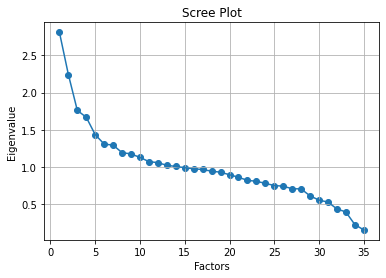

In [104]:
# Create scree plot using matplotlib

plt.scatter(range(1,df.shape[1]+1),eigen_values)
plt.plot(range(1,df.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Test for normality
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html, if p value is greater than 0.05, the data is nornally distributed. If less than 0.05 then not normally distributed.

anova- normally distributed with multiple variables
Kruskal Wallis test- not normally distributed with multiple variables

https://www.datacamp.com/community/tutorials/introduction-factor-analysis
https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html

time series- use arima
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/


Classification -Determine which one performs better
Randomforest classifier
Decisiontree classifier
SGDclassifier
KNeighbours classifier